# <img style="float: left; padding-right: 10px; width: 150px" src="../_UNITBV_ADS_2019/unitbv2.png"> SIIPA2020- Știința Explorării și Exploatării Datelor - ADS1  






## <center>Curs 6 - Vizualizare Datelor: exemple</center>
**Universitatea Transilvania**<br>
**Semestrul I, 2020-2021**<br>
**Instructor:** Conf. univ. dr. Teodor &Scedil;tefan B&icirc;ldea<br>
**Contact:** teodor.bildea@unitbv.ro<br>


Instructiuni:
    
    - downloadati o copie a acestui notebook de pe google drive
    _ downloadati tot folderul cu datele proiectelor local pe C:\temp\
    - upload in jupyter 
    - schimbati numele fisierului adaugand la sfarsit numele vostru
    - urmati indicatiile din notebook si completati exercitiile
    
    
> SFAT: pentru toate exercitiile se poate folosi internetul pentru solutie daca este nevoie - stackoverflow este plin de oameni dornici sa ajute si care probabil au raspuns deja altora ca voi care au inceput sa invete Python mai devreme.

Import librarii necesare

In [20]:
import pandas as pd
import numpy as np
import sqlite3

## Recapitulare si completari

### Alte moduri de selectare a unei submultimi din dataframe:

> .loc: access la inregistrari cu specificarea valorilor cautate sau a unui sablon boolean

> .iloc: access prin precizarea numarului liniei si/sau a coloanei

## .loc

### Exemplu:

Dupa cum vedeti s-a strecurat un tipo - `Uncofirmed` care a dus la aparitia unei categorii noi, in mod eronat. Editati eroarea si coretati-o cu `Unconfirmed` selectand coloana si conditionand ca valoarea sa fie cea incorecta, si atribuind acestor inregistrari valoarea corecta

In [4]:
file_name = 'monitor_one_daily_output.csv'

# citire fisierului - 'df' de la dataframe, si un nume de variabila:
df_sample_csv = pd.read_csv ( file_name)

# verificam primele linii invocand functia head:
df_sample_csv.Belief.drop_duplicates()

0                   Weak
1             Uncofirmed
11    Strong but overdue
20           Unconfirmed
49                Strong
Name: Belief, dtype: object

În acest exemplu voi folosi un șablon boolean, de condiționare a liniilor.
După virgula se pot selecta coloanele dorite.

Când se selectează o singura coloană, nu e nevoie de lista.

In [5]:
df_sample_csv.loc[ df_sample_csv['Belief'] == 'Uncofirmed','Belief'].shape

(49,)

În toate înregistrările cu typo corectăm valoare din coloana <b>Belief</b>:

In [8]:
df_sample_csv.loc[ df_sample_csv['Belief'] == 'Uncofirmed','Belief'] = 'Unconfirmed'

In [9]:
df_sample_csv[ df_sample_csv['Belief'] == 'Uncofirmed'].shape

(0, 10)

Alte exemple de selectare cu .loc

In [10]:
df_sample_csv.loc[0:10,['Likelihood_Score','Belief']]

,Likelihood_Score,Belief
0,92.703030,Weak
1,79.393106,Unconfirmed
2,90.546950,Unconfirmed
3,99.561564,Unconfirmed
4,100.000000,Unconfirmed
5,99.733736,Unconfirmed
6,99.911712,Unconfirmed
7,74.836137,Unconfirmed
8,99.941313,Unconfirmed
9,99.790908,Unconfirmed


## .iloc

Selectare pe baza de numaru de linie si de coloana. 

Se pot folosi intervale de linii si coloane. 

Prima data se precizeaza liniile, urmate de virgula si precizarea coloanelor.

### Exemple:

Prima linie, a doua coloana (indexul pozitional porneste de la 0!)

In [11]:
df_sample_csv.iloc[0,1]

'2/24/2019'

O lista de linii si alta de coloane

In [12]:
df_sample_csv.iloc[[0,3,7,8],[1,3,5]]

,date_only,Daily_Outcome_Idx,Over Heat Event
0,2/24/2019,2,NaN
3,2/20/2019,2,NaN
7,2/11/2019,0,NaN
8,2/6/2019,0,NaN


Atat pentru linii cat si pentru coloane se pot preciza de valori de tip `<inceput>:<sfarsit>` dupa cum urmeaza:

- selectam a opta inregistrare si coloanele 2,3,4:

In [13]:
df_sample_csv.iloc[7,2:4]

Daily_Outcome        Overheat in less than 7 days
Daily_Outcome_Idx                               0
Name: 7, dtype: object

- primele opt inregistrari si coloanele 2,3,4

In [14]:
df_sample_csv.iloc[0:7,2:4]

,Daily_Outcome,Daily_Outcome_Idx
0,Overheat in more than 14 days,2
1,"Overheat in [7, 14] days",1
2,Overheat in less than 7 days,0
3,Overheat in more than 14 days,2
4,Overheat in more than 14 days,2
5,"Overheat in [7, 14] days",1
6,Overheat in less than 7 days,0


- ceva mai exotic: toate coloanele impare cu ajutorul unei expresii `lambda`

In [15]:
df_sample_csv.iloc[ lambda x: x.index % 2 == 0, [0,1,3]]

,car,date_only,Daily_Outcome_Idx
0,2221138,2/24/2019,2
2,2221138,2/22/2019,0
4,2221138,2/19/2019,2
6,2221138,2/12/2019,0
8,2221138,2/6/2019,0
...,...,...,...
142,2221251,12/13/2018,0
144,2221251,12/11/2018,0
146,2221251,12/9/2018,0
148,2221251,12/7/2018,0


# Vizualizare datelor

## Date numerice, date categoriale

> bar graph, box plot, line graph, scatter plot, etc.

Mi-am propus zece grafice, cate unul pentru fiecare proiect.

Voi trece in revista 3 pachete de functii grafice:

In [90]:
import seaborn as sns # visualize
import matplotlib.pyplot as plt
import plotly.express as px


## CONFIGURARE CITIRE

## Intermezzo tehnic pentru a putea sa ma asigur ca pot citi datele

In urmatoarele 2 celule testez codul pentru citirea datelor

In [17]:
import  glob
p =  r'C:\work\UNITBV_DataMining\2020-2021\SEED_ADS\Curs\Echipe\DateProiecte\Echipa'

#listarea numelor de fisiere din calea p care sunt te tip csvȘ
result = glob.glob( p + '1/' + '*.csv' )
result

['C:\\work\\UNITBV_DataMining\\2020-2021\\SEED_ADS\\Curs\\Echipe\\DateProiecte\\Echipa1\\audi.csv',
 'C:\\work\\UNITBV_DataMining\\2020-2021\\SEED_ADS\\Curs\\Echipe\\DateProiecte\\Echipa1\\bmw.csv',
 'C:\\work\\UNITBV_DataMining\\2020-2021\\SEED_ADS\\Curs\\Echipe\\DateProiecte\\Echipa1\\cclass.csv',
 'C:\\work\\UNITBV_DataMining\\2020-2021\\SEED_ADS\\Curs\\Echipe\\DateProiecte\\Echipa1\\focus.csv',
 'C:\\work\\UNITBV_DataMining\\2020-2021\\SEED_ADS\\Curs\\Echipe\\DateProiecte\\Echipa1\\ford.csv',
 'C:\\work\\UNITBV_DataMining\\2020-2021\\SEED_ADS\\Curs\\Echipe\\DateProiecte\\Echipa1\\hyundi.csv',
 'C:\\work\\UNITBV_DataMining\\2020-2021\\SEED_ADS\\Curs\\Echipe\\DateProiecte\\Echipa1\\merc.csv',
 'C:\\work\\UNITBV_DataMining\\2020-2021\\SEED_ADS\\Curs\\Echipe\\DateProiecte\\Echipa1\\skoda.csv',
 'C:\\work\\UNITBV_DataMining\\2020-2021\\SEED_ADS\\Curs\\Echipe\\DateProiecte\\Echipa1\\toyota.csv',
 'C:\\work\\UNITBV_DataMining\\2020-2021\\SEED_ADS\\Curs\\Echipe\\DateProiecte\\Echipa1\\uncl

In [55]:
# citirea datelor
import os
import glob

input_path = r'C:\work\UNITBV_DataMining\2020-2021\SEED_ADS\Curs\Echipe\DateProiecte\Echipa'
#C:/temp/ProjectDataSets
files = {'echipa1':{'cale':'1',
                    'tip':'csv',
                     'fisiere':glob.glob( input_path + '1/' + '*.csv' )
                    },
            'echipa2':{'cale':'2',
                       'tip':'csv',
                     'fisiere':glob.glob( input_path + '2/' + '*.csv' )
                    },
            'echipa3':{'cale':'3',
                       'tip':'csv',
                     'fisiere':glob.glob( input_path + '3/' + '*.csv' )
                    },
            'echipa4':{'cale':'4',
                       'tip':'csv',
                     'fisiere':glob.glob( input_path + '4/' + '*csv' )
                    },
            'echipa5':{'cale':'5',
                       'tip':'xlsx',
                     'fisiere':glob.glob( input_path + '5/' + '*.xlsx' )
                    },
            'echipa6':{'cale':'6',
                       'tip':'sqlite',
                     'fisiere':glob.glob( input_path + '6/' + '*.sqlite' )
                    },
            'echipa7':{'cale':'7',
                       'tip':'csv',
                       'fisiere':glob.glob( input_path + '7/' + '*.csv' )+glob.glob( input_path + '7/' + '*.json' ),
#             'echipat7.II':{'cale':'7',
#                        'tip':'json',
#                        'fisiere':glob.glob( input_path + '7/' + '*.json' )
                       
                    },
            'echipa8':{'cale':'8',
                       'tip':'csv',
                     'fisiere':glob.glob( input_path + '8/' + '*.csv' )
                    },
            'echipa9':{'cale':'9',
                       'tip':'xlsx',
                     'fisiere':glob.glob( input_path + '9/' + '*.xlsx' )
                    }
            
        }

In [56]:
glob.glob( input_path + '7/' + '*.csv' )+glob.glob( input_path + '7/' + '*.json' )

['C:\\work\\UNITBV_DataMining\\2020-2021\\SEED_ADS\\Curs\\Echipe\\DateProiecte\\Echipa7\\winemag-data-130k-v2.csv',
 'C:\\work\\UNITBV_DataMining\\2020-2021\\SEED_ADS\\Curs\\Echipe\\DateProiecte\\Echipa7\\winemag-data_first150k.csv',
 'C:\\work\\UNITBV_DataMining\\2020-2021\\SEED_ADS\\Curs\\Echipe\\DateProiecte\\Echipa7\\winemag-data-130k-v2.json']

In [ ]:
def citire_date_echipa(nume_echipa):
    
    team_dfs ={}
    
    team = nume_echipa
    print('citire pt ', team)
    dataset = files[team]
#    try:
        
    

    dataframes = []
    
    i=0
    n = len(dataset['fisiere'])
    for f in dataset['fisiere']:
        
        i+=1
        print('{0} out of {1}: {2}'.format(str(i),str(n), f))
        try:

            # extensia fisierului 
            extension = f.split('.')[-1]

            if extension == 'csv':
                # citire fisier csv
                df_temp = pd.read_csv(f,header = 0)

            elif extension == 'xlsx':
                df_temp = pd.read_excel(f, header = 0)
                
            elif extension == 'json':
                df_temp = pd.read_json(f,orient='records')

            elif extension == 'sqlite':    
                conn = sqlite3.connect( f)

                # numele tabelelor
                df_tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table' ORDER BY name;", conn)
                print(df_tables)
                #dataframes = []
                n = len(list(df_tables.name.values))
                for i in range(n):

                    t = df_tables.name.values[i]
                    print('extragere date tabel {0} ({1} out of {2})'.format( t,str(i),str(n)))
                    
                    try:
                        df_temp = pd.read_sql_query("SELECT * FROM " + t, conn)

                        dataframes.append(df_temp)
                        # eliberarea memoriei
                        del df_temp
                    except:
                        print("eroare la citirea tabele {0} ({1} out of {2})".format( t,str(i),str(n)))

            if extension != 'json': 
                # adaugare dataframe la colectia de dataframe-uri
                dataframes.append(df_temp)
            # eliberarea memoriei
            del df_temp
        except:
            print('eroare la citire fisierelor pt ', team, 'fisier ', f)

    team_dfs[team] = dataframes

    print('echipa ', team, ' are ', len(team_dfs[team]), 'dataframe-uri.')

    return team_dfs

## Exemplul 1. Echipa 9

### Line plots

In [82]:
date_echipa = citire_date_echipa('echipa9')['echipa9']


citire pt  echipa9
1 out of 1: C:\work\UNITBV_DataMining\2020-2021\SEED_ADS\Curs\Echipe\DateProiecte\Echipa9\Predict Sales.xlsx
echipa  echipa9  are  1 dataframe-uri.


In [83]:
date_echipa[0].columns


Index(['OrderDate', 'GMV', 'Units', 'PaymentType', 'SLA', 'Category',
       'MarkedPrice', 'SLA.1'],
      dtype='object')

In [84]:
date_echipa[0].head(5)

,OrderDate,GMV,Units,PaymentType,SLA,Category,MarkedPrice,SLA.1
0,2016-06-11 11:52:00,607,1,Prepaid,6,CameraAccessory,1339,3
1,2016-05-31 18:48:00,413,1,COD,15,CameraAccessory,848,2
2,2016-05-30 17:51:00,378,1,Prepaid,9,CameraAccessory,848,2
3,2016-05-30 17:51:00,664,1,COD,6,CameraAccessory,1448,4
4,2016-05-28 22:27:00,372,1,Prepaid,6,GamingHardware,348,3


Ar fi interesant sa vedem volumul lunar al vanzarilor. Pentru asta vom construi doua noi coloane

> ItemRevenue

> InvoiceMonth - asta va da un exemplu de formatare a datelor in Python

In [85]:
date_echipa[0]['Revenue'] = date_echipa[0]['Units'] * \
                            date_echipa[0]['MarkedPrice']


Un mod eficace de a trece din format `datetime` in str:

In [110]:
from datetime import datetime
date_echipa[0]['InvoiceMonth'] = date_echipa[0]['OrderDate'].\
apply(lambda x: str(x.year) + '-'+ ( '0' if x.month <10 else '') + str(x.month))

In [111]:
date_echipa[0].head()

,OrderDate,GMV,Units,PaymentType,SLA,Category,MarkedPrice,SLA.1,Revenue,InvoiceMonth
0,2016-06-11 11:52:00,607,1,Prepaid,6,CameraAccessory,1339,3,1339,2016-06
1,2016-05-31 18:48:00,413,1,COD,15,CameraAccessory,848,2,848,2016-05
2,2016-05-30 17:51:00,378,1,Prepaid,9,CameraAccessory,848,2,848,2016-05
3,2016-05-30 17:51:00,664,1,COD,6,CameraAccessory,1448,4,1448,2016-05
4,2016-05-28 22:27:00,372,1,Prepaid,6,GamingHardware,348,3,348,2016-05


In [112]:
# sa vedem volumul lunar de vanzari

df_sample = date_echipa[0].groupby('InvoiceMonth')['Revenue'].agg('sum').reset_index()
df_sample.head(5)

,InvoiceMonth,Revenue
0,2015-08,395
1,2015-09,97187
2,2015-10,930409911
3,2015-11,546207198
4,2015-12,746291693


Ca si cu toate celelalte, vizualizarea depinde de libraria folosita:

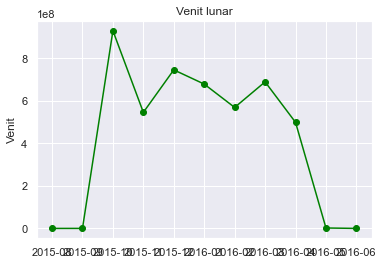

In [113]:

# create a line chart, years on x-axis, gdp on y-axis
plt.plot(df_sample.InvoiceMonth, df_sample.Revenue, 
         color='green', marker='o', linestyle='solid')
# add a title
plt.title("Venit lunar")
# add a label to the y-axis
plt.ylabel("Venit")
plt.show()

Dupa cum vedem, etichetele lunilor sunt suprascrise. Pentru a evita acest aspect putem roti etichetele.

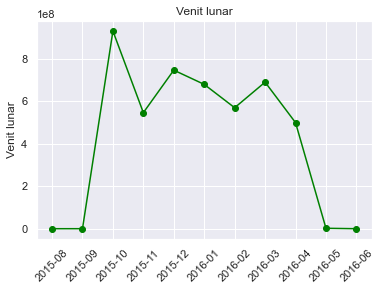

In [114]:
plt.plot(df_sample.InvoiceMonth, df_sample.Revenue, color='green', marker='o', linestyle='solid')
# add a title
plt.title("Venit lunar")
# add a label to the y-axis
plt.ylabel("Venit lunar")
plt.xticks(range(df_sample.shape[0]), df_sample.InvoiceMonth, rotation=45)
plt.show()

### Acum sa vedem acelasi grafic cu seaborn


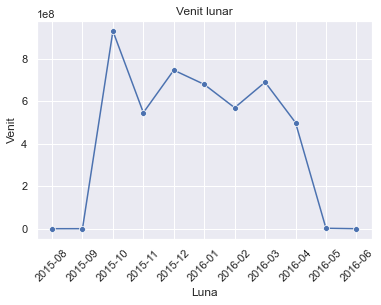

In [115]:
sns.set() #Seteza parameterii estetici intr-un singur pas. Puteti explora cu stiluri

ax = sns.lineplot(x="InvoiceMonth", y="Revenue", data=df_sample, marker='o')
ax.set_title('Venit lunar')
ax.set_ylabel("Venit")
ax.set_xlabel("Luna")
ax.set_xticklabels(df_sample.InvoiceMonth, rotation = 45)
plt.show()

### Acelasi grafic cu pachetul plotly

In [118]:
# import plotly.express as px

df = df_sample
# df.InvoiceMonth = df.InvoiceMonth.astype('str')
# fig = px.line(df, x="InvoiceMonth", y="Revenue", title='Monthly Revenue')
# fig.show()

import plotly.graph_objects as go

fig = go.Figure(data=go.Scatter(x=df.InvoiceMonth, y=df.Revenue))
fig.show()

## EXERCITIUL 1:

1. Determinati cea mai bine vanduta categorie de produse
2. Prezentati graficul de venit lunar pentru acea categorie de produse

In [119]:
# codul vostru aici


# Exemplul 2. Echipa 2

## Bar Charts

Un grafic de bare este o alegere bună atunci când doriți să arătați cum variază o anumită cantitate într-un un set de elemente discrete.

In [120]:
date_echipa = citire_date_echipa('echipa2')['echipa2']

citire pt  echipa2
1 out of 4: C:\work\UNITBV_DataMining\2020-2021\SEED_ADS\Curs\Echipe\DateProiecte\Echipa2\sample_sub.csv
2 out of 4: C:\work\UNITBV_DataMining\2020-2021\SEED_ADS\Curs\Echipe\DateProiecte\Echipa2\test_data.csv
3 out of 4: C:\work\UNITBV_DataMining\2020-2021\SEED_ADS\Curs\Echipe\DateProiecte\Echipa2\train_data.csv
4 out of 4: C:\work\UNITBV_DataMining\2020-2021\SEED_ADS\Curs\Echipe\DateProiecte\Echipa2\train_data_dictionary.csv
echipa  echipa2  are  4 dataframe-uri.


In [121]:
date_echipa[2].head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


Sa vedem distributia clientilor in functie de pachetul de internet:

Text(0.5, 1.0, 'Clients by internet type')

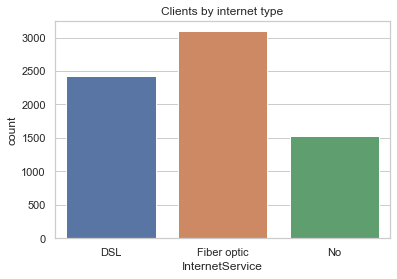

In [166]:
df_sample = date_echipa[2]
sns.set(style="whitegrid")
ax = sns.countplot(x="InternetService", data=df_sample)
ax.set_title('Clients by internet type')

Daca in loc de count dorim sa agregam pe axa y o alta variabila vom folosi

`seaborn.barplot`

De exemplu sa vedem varsta medie a celor care stau sau pleaca in functie de sex:

In [167]:
date_echipa[0].head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


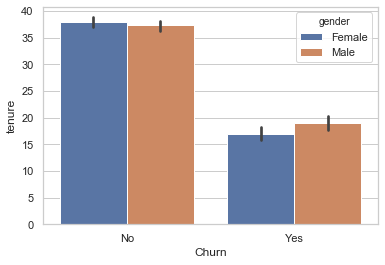

In [168]:
ax = sns.barplot( x= "Churn", y = "tenure", 
                 hue = "gender", data = date_echipa[0])

Observam in graficul anterior un parametru nou `hue` in functite de care se pot face grupari. 

In cazul nostru puteam sa calculam si vechimea medie a celor care pleaca indiferent de sex. 

Distinctia prin hue poate face mai relevanta informatia. 

Acest parametru se poate folosi in mai toate graficele seaborn.

Mai jos inca un exemplu cu x si hue interschimbate.

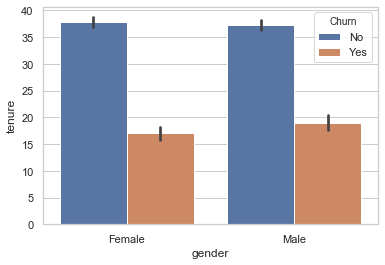

In [169]:
ax = sns.barplot( x= "gender", y = "tenure", hue = "Churn", data = date_echipa[0])

### Exercitiul 2

Folosind date_echipa[0] plotati un grafic cu plata medie lunara (Monthly Charges) pe categorii de Contract.

Apoi faceti acelasi grafic dar introduceti gruparea (cu hue) pe gender

In [ ]:
# codul vostru aici

# Exemplul 3 - Echipa 2

## Histogram

Histogramele sunt o prezentare aproximativa a densitatii de distributie a unei variabile continue.

In [170]:
date_echipa = citire_date_echipa('echipa2')['echipa2']


citire pt  echipa2
employee_survey_data.csv
general_data.csv
in_time.csv
manager_survey_data.csv
out_time.csv
echipa  echipa2  are  5 dataframe-uri.


In [171]:
date_echipa[1].dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeID                   int64
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
Over18                      object
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object

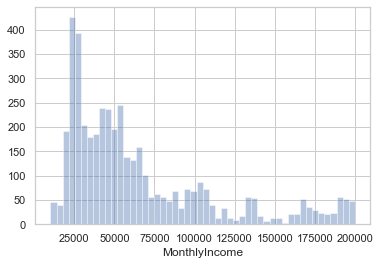

In [172]:
sns.distplot(date_echipa[1].MonthlyIncome, bins=50, kde=False, rug=False)

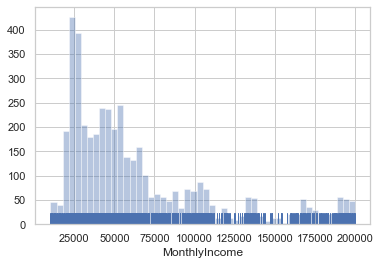

In [173]:
sns.distplot(date_echipa[1].MonthlyIncome, bins=50, kde=False, rug=True)

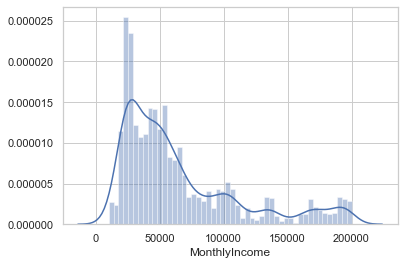

In [174]:
sns.distplot(date_echipa[1].MonthlyIncome, bins=50, kde=True, rug=False)

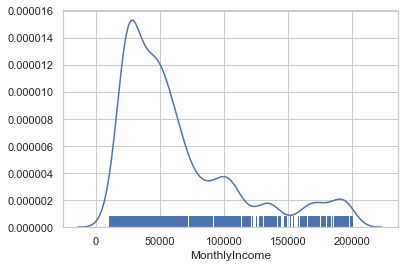

In [175]:
sns.distplot(date_echipa[1].MonthlyIncome, bins=50, hist = False, kde=True, rug=True)

Sa vedem influenta numarului de bare (bins) folosit:

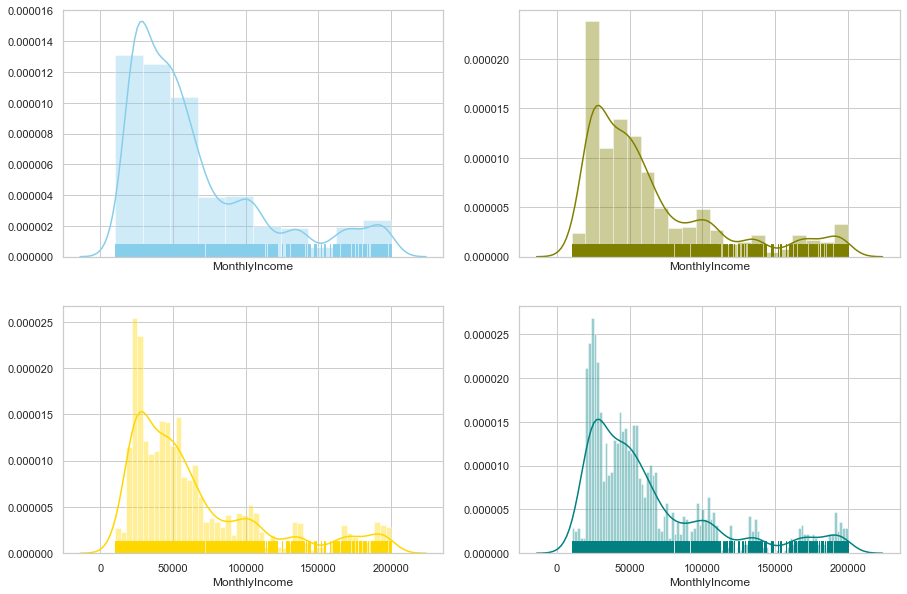

In [176]:
f, axes = plt.subplots(2, 2, figsize=(15, 10), sharex=True)

sns.distplot( date_echipa[1].MonthlyIncome, 
             bins=10, kde=True, rug=True, color="skyblue", ax=axes[0, 0])
sns.distplot( date_echipa[1].MonthlyIncome, bins=20, kde=True, rug=True , color="olive", ax=axes[0, 1])
sns.distplot( date_echipa[1].MonthlyIncome, bins=50, kde=True, rug=True , color="gold", ax=axes[1, 0])
sns.distplot( date_echipa[1].MonthlyIncome, 
             bins=100, kde=True, rug=True , color="teal", ax=axes[1, 1])

#sns.plt.show()

Doua distributii in acelasi plot:

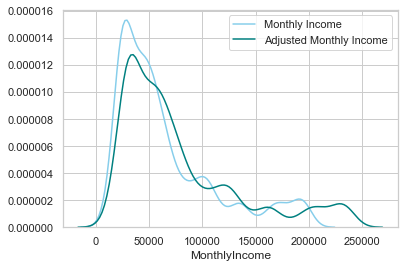

In [177]:
sns.distplot( date_echipa[1].MonthlyIncome, bins=10, hist=False,kde=True, rug=False, 
             color="skyblue", label = "Monthly Income")
sns.distplot( 1.2*date_echipa[1].MonthlyIncome, bins=100, hist = False, kde=True, rug=False , 
             color="teal", label = "Adjusted Monthly Income")
plt.legend()

## Exercitiul 3

1. Pe acelasi grafic reprezentati distributia venitului lunar (MonthlyIncome) pentru fiecare statut marital (MaritalStatus)


In [ ]:
# codul vostru aici

2. In doua grafice alaturate reprezentati distributia distantei fata de casa (DistanceFromHome) pentru fiecare statut marital

In [ ]:
# codul vostru aici

# Exemplul 4

## Pie charts

In [178]:
date_echipa = citire_date_echipa('echipa3')['echipa3']

citire pt  echipa3
student-mat.csv
student-por.csv
echipa  echipa3  are  2 dataframe-uri.


In [179]:
date_echipa[0].head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [180]:
date_echipa[0].dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

Un alt mod de a prezenta agregari de categorii, la nivel de proportii, este pie chart: feliile de pizza/placinta.

Sa vedem proportia copiilor pe tipurile de ocupatie ale mamei precum si nota finala medie pe aceste grupuri.

Vom face un pie chart pentru proportii; vom colora specific grupului si vom eticheta cu tipurile de ocupatie.

In [182]:
df_sample = date_echipa[0].groupby('Mjob')['absences'].agg(['mean','sum']).reset_index()
df_sample

,Mjob,mean,sum
0,at_home,4.694915,277
1,health,4.558824,155
2,other,6.170213,870
3,services,6.019417,620
4,teacher,5.741379,333


In [183]:
df_sample.dtypes

Mjob     object
mean    float64
sum       int64
dtype: object

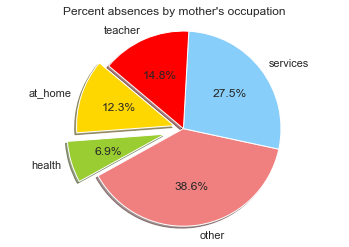

In [185]:
import matplotlib.pyplot as plt

# Data to plot
labels = df_sample['Mjob']
sizes = df_sample['sum'].to_list()
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','red']
explode = (0.1, 0.2, 0, 0,0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Percent absences by mother's occupation")
plt.axis('equal')
plt.show()

## Exercitiul 4

Reprezentati printr-un pie chart:
    1. timpul mediu de studiu (studytime) in functie de ocupatia tatalui (Fjob)
    2. timpul mediu pana la scoala (travel time) in functie de tipul de educatie al mamei (Medu)

# Exemplu 5 - Echipa 5

## Donut charts

Cu ajutorul acestui tip de grafic se pot reprezenta proportii de mai multe tipuri simultan.

In [186]:
date_echipa = citire_date_echipa('echipa5')['echipa5']

citire pt  echipa5
credit_test.csv
credit_train.csv
echipa  echipa5  are  2 dataframe-uri.


In [187]:
date_echipa[1].head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [188]:
date_echipa[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10353 entries, 0 to 10352
Data columns (total 18 columns):
Loan ID                         10000 non-null object
Customer ID                     10000 non-null object
Current Loan Amount             10000 non-null float64
Term                            10000 non-null object
Credit Score                    8019 non-null float64
Annual Income                   8019 non-null float64
Years in current job            9573 non-null object
Home Ownership                  10000 non-null object
Purpose                         10000 non-null object
Monthly Debt                    10000 non-null float64
Years of Credit History         10000 non-null float64
Months since last delinquent    4694 non-null float64
Number of Open Accounts         10000 non-null float64
Number of Credit Problems       10000 non-null float64
Current Credit Balance          10000 non-null float64
Maximum Open Credit             10000 non-null float64
Bankruptcies         

Sa incercam sa vedem proportia de proprietari (Home Ownership =  owners) care iau imprumut pentru a imbunatati casa (Purpose = home improvement)

In [189]:
date_echipa[0].groupby('Home Ownership')['Loan ID'].agg('count').index

Index(['HaveMortgage', 'Home Mortgage', 'Own Home', 'Rent'], dtype='object', name='Home Ownership')

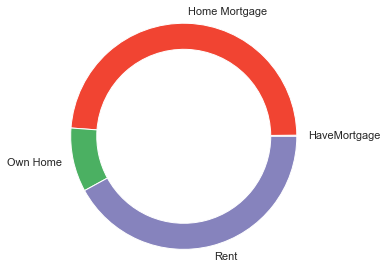

In [190]:
# Libraries
import matplotlib.pyplot as plt
 
# enumaram proprietarii
group_names = date_echipa[0].groupby('Home Ownership')['Loan ID'].agg('count').index

# numaram proprietarii
group_size=date_echipa[0].groupby('Home Ownership')['Loan ID'].agg('count').values

subgroup_names=date_echipa[0].groupby(['Home Ownership','Purpose'])['Loan ID'].agg('count').index
subgroup_names=[s[1].replace("'","").replace("}","") for s in subgroup_names]
subgroup_size=date_echipa[0].groupby(['Home Ownership','Purpose'])['Loan ID'].agg('count').values
 
# Creare culori
my_colors=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens, plt.cm.Purples, plt.cm.Oranges]
my_color_lenghts = date_echipa[0][['Home Ownership','Purpose']].drop_duplicates().groupby('Home Ownership')['Purpose'].count()

# Inel exterior
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors=[c(0.6) for c in my_colors] )
plt.setp( mypie, width=0.3, edgecolor='white')
 
colors = []
for i in range(len(my_colors)):
    
    for j in range(subgroup_size[i]):
        colors.append(my_colors[i](0.6- j * 0.1))
        

plt.margins(0,0)
 
# show it
plt.show()

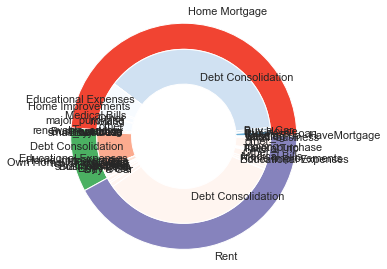

In [191]:
# Libraries
import matplotlib.pyplot as plt
 
# enumaram proprietarii
group_names = date_echipa[0].groupby('Home Ownership')['Loan ID'].agg('count').index

# numaram proprietarii
group_size=date_echipa[0].groupby('Home Ownership')['Loan ID'].agg('count').values

subgroup_names=date_echipa[0].groupby(['Home Ownership','Purpose'])['Loan ID'].agg('count').index
subgroup_names=[s[1].replace("'","").replace("}","") for s in subgroup_names]
subgroup_size=date_echipa[0].groupby(['Home Ownership','Purpose'])['Loan ID'].agg('count').values
 
# Creare culori
my_colors=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens, plt.cm.Purples, plt.cm.Oranges]
my_color_lenghts = date_echipa[0][['Home Ownership','Purpose']].drop_duplicates().groupby('Home Ownership')['Purpose'].count()

# Inel exterior
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors=[c(0.6) for c in my_colors] )
plt.setp( mypie, width=0.3, edgecolor='white')
 
colors = []
for i in range(len(my_colors)):
    
    for j in range(subgroup_size[i]):
        colors.append(my_colors[i](0.6- j * 0.1))
        
# Inel interior
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, labeldistance=0.7, 
                   colors=colors)
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
 
# show it
plt.show()

In [ ]:
citire_date_echipa('echipa5')['echipa5'][0].columns

In [ ]:
# Exercitiul 5

1. Donut chart cu distributia celor cu imprumut in functie de anii in care au istoric de credit (Years of Credit History)

Bonus: dispunerea radiala a etichetelor in graficul de mai sus cu doua inele.

# Exemplul 6 - Echipa 6

## Boxplot

Grafic care prezinta distributia unei variabile folosind precentile. Util pentru compararea unor distributii si a evolutiei in timp, sau pentru comparare alaturata a unor variabile continue asemanatoare

In [192]:
date_echipa = citire_date_echipa('echipa6')['echipa6']
date_echipa[1].columns

citire pt  echipa6
test.csv
train.csv
echipa  echipa6  are  2 dataframe-uri.


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
date_echipa[1].YrSold.drop_duplicates()

As vrea sa vad pretul caselor in boxplot. Apoi as vrea sa vad comparate boxloturi pe ani in acelasi grafic ca sa vad 
cum s-a modificat distributia preturilor in timp.

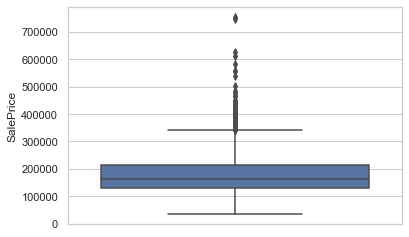

In [193]:
ax = sns.boxplot(y="SalePrice",data=date_echipa[1])

In [ ]:
ax = sns.boxplot(x="YrSold", y="SalePrice", data=date_echipa[1], palette="Set3")

Ames este un orasel universitar din statul Iowa. Vara sunt peste 30 Celsius cu umiditate, iar iarna ajunge si la -20 Celsius 
uneori pentru zile in sir. 

Sa vedem cum este afectat pretul caselor de faptul ca au sau nu au instalatie mixta de aer conditionat si de incalzire.

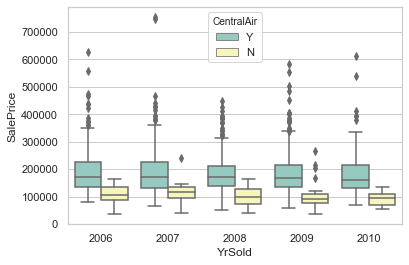

In [194]:
ax = sns.boxplot(x="YrSold", y="SalePrice", hue="CentralAir",data=date_echipa[1], palette="Set3")

# Exercitiul 6

1. Care sunt cartierele cu cele mai scumpe case? Exista acolo case fara instalatie de aer conditionat? 
Boxplot cu distributia preturilor (SalePrice) la case pretul de cel putin 500.000USD in functie de cartiere (Neighborhood) 

2.Care sunt cartierele cu cele mai ieftin case? Exista acolo case fara instalatie de aer conditionat? Are vreo relevanta in pret?
Boxplot cu distributia preturilor (SalePrice) la case pretul de cel putin 50.000USD in functie de cartiere (Neighborhood)

In [ ]:
# codul vostru aici

# Exemplul 7 - echipa 7

## Scatterplot

In [195]:
date_echipa = citire_date_echipa('echipa7')['echipa7']


citire pt  echipa7
Test_Beneficiarydata-1542969243754.csv
Test_Inpatientdata-1542969243754.csv
Test_Outpatientdata-1542969243754.csv
Test-1542969243754.csv
Train_Beneficiarydata-1542865627584.csv
Train_Inpatientdata-1542865627584.csv
Train_Outpatientdata-1542865627584.csv
Train-1542865627584.csv
echipa  echipa7  are  8 dataframe-uri.


In [197]:
date_echipa[6].columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
      dtype='object')

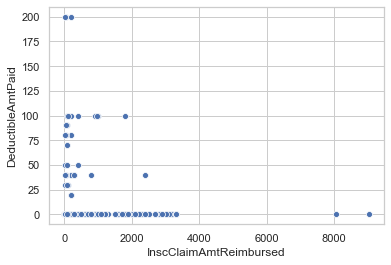

In [198]:
ax = sns.scatterplot(x="InscClaimAmtReimbursed", y="DeductibleAmtPaid", data=date_echipa[6].loc[0:1000])


In [199]:
date_echipa[6][['InscClaimAmtReimbursed','DeductibleAmtPaid']].describe()

,InscClaimAmtReimbursed,DeductibleAmtPaid
count,517737.000000,517737.000000
mean,286.334799,2.779233
std,694.034343,15.785839
min,0.000000,0.000000
25%,40.000000,0.000000
50%,80.000000,0.000000
75%,200.000000,0.000000
max,102500.000000,897.000000


Vedem ca la despagubiri a 75 percentila e 200USD. Cati asiguratori sunt care au platit mai mult de 3000USD in despagubiri?

In [200]:
date_echipa[6][date_echipa[6].InscClaimAmtReimbursed>15000].shape

(21, 27)

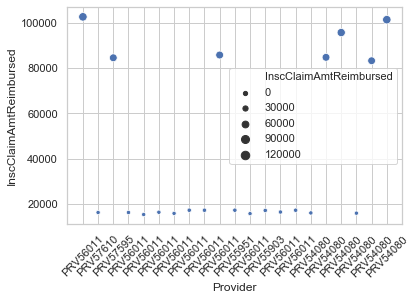

In [201]:
ax = sns.scatterplot(x="Provider", 
                     y="InscClaimAmtReimbursed", 
                     data=date_echipa[6][date_echipa[6].InscClaimAmtReimbursed>15000],
                     size = "InscClaimAmtReimbursed" )

ax = ax.set_xticklabels(date_echipa[6].Provider, rotation = 45)


# Exercitiul 7

Scatter plot cu despagurie acordata (InscClaimAmtReimbursed) si coplata pentru primele 100 cereri mai mari de 15000D. 

Hint: Sortarea unui dataframe: df.sort_values(by =[<lista coloane], ascending = [<lista True/False pt fiecare coloana sortata>])

In [ ]:
# Bonus plots

In [ ]:
## time series animation
## circular graphs https://mne.tools/stable/auto_examples/connectivity/plot_mne_inverse_label_connectivity.html
## word frequency

# Bonus plot - word count

Sunt multe librarii care fac asta. Vom folosi WordCloud care nu vine cu Anaconda si o vom instala ad-hoc

In [203]:
!pip install wordcloud

Scopul este sa obtinem o ilustarare grafica a asiguratorilor in functie de numarul de cereri de despagubire:

(-0.5, 399.5, 199.5, -0.5)

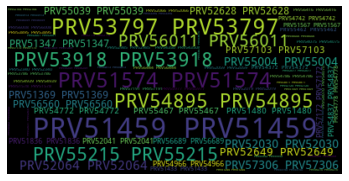

In [204]:
from wordcloud import WordCloud

# numaram cazurile pe asigurator
word_freq = date_echipa[6].groupby('Provider')['ClaimID'].count()
text = " ".join([(k + " ")*v for k,v in word_freq.items()])

# Generare de word cloud image
wordcloud = WordCloud().generate(text)


# Display imagine generata:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")



# Corelatii intre atribute numerice



### Coeficientul de corelatie pentru doua serii numerice

### Matricea de corelatie

# Exemplul 8 - Echipa 9

In [ ]:
date_echipa = citire_date_echipa('echipa9')['echipa9']

In [ ]:
date_echipa[1].dtypes

In [ ]:
corr = date_echipa[1].avg_glucose_level.values,date_echipa[1].bmi.values)

In [ ]:
ax = sns.scatterplot(x='avg_glucose_level',y='bmi',data=date_echipa[1])
#ax.set_title()

### Vizualizarea matricei de corelatie

# Exmplul 9

### Matricea de corelatie cu subgrupuri si scatter plot

# Exemplul 10

## Codificarea atributelor categoriale - reguli de buna practica

### Atribute binare
### Ordine explicita
### Ordine bazata pe agregarea unei variabile de interes
### In absenta oricarei ordini - One-Hot-Encoding

## O metoda de reducere a dimensiunii: Principal Component Analysis

### Componenetele principale

### Reconstructia partiala si eroarea de reconstructie

### Matricea de proiectie si utilizarea in practica: exemplul SPC